<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Class_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

In [3]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [4]:
united = np.random.multivariate_normal(mean, cov, 4000)

In [7]:
x11, x22, x33 = united.T
united_y = unit_sphere(united)

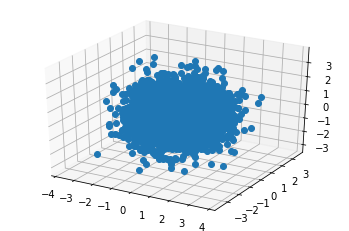

In [6]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.25)

In [59]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

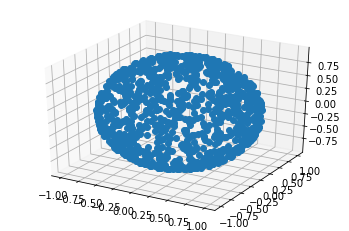

In [60]:
x11, x22, x33 = Y_test.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers

Using TensorFlow backend.


In [61]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)

In [36]:
# Instantiate an optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.01)

In [62]:
# training dataset
batch_size = 100

In [63]:
X_train = tf.cast(X_train, tf.float32)
Y_train = tf.cast(Y_train, tf.float32)

In [64]:
X_val = tf.cast(X_val, tf.float32)
Y_val = tf.cast(Y_val, tf.float32)

In [65]:
X_test = tf.cast(X_test, tf.float32)

In [66]:
# creates a dataset with a separate element fro each row of the input tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size= 3000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).shuffle(1000).batch(batch_size)

In [67]:
optimizer = tf.keras.optimizers.Adam(1e-3)
epochs = 500

In [68]:
# create an loss function # not effective
def Keras_loss_function(y_actual, y_predicted):
  mse = kb.mean(kb.sum(kb.square(y_actual - y_predicted))) # (1/n*(sum(sqr(Y-Y_hat))))
  return mse

# first 100 epochs is useful

In [69]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # print(linear)
      # compute the loss value for this minibatch
      mse = Keras_loss_function(y_batch_train, linear)
      # mse = tf.keras.losses.MSE(y_batch_train, linear)
      # print(mse)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(mse))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = Keras_loss_function(y_batch_val, val_linear)

  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_mse)))



Start of epoch 0
Training loss (for one batch) at step 0: 161.4005
seen so far: 100 samples
Training loss (for one batch) at step 10: 147.6059
seen so far: 1100 samples
Training loss (for one batch) at step 20: 137.6904
seen so far: 2100 samples
validation MSE: 58.1657

Start of epoch 1
Training loss (for one batch) at step 0: 120.0262
seen so far: 100 samples
Training loss (for one batch) at step 10: 117.2203
seen so far: 1100 samples
Training loss (for one batch) at step 20: 104.5565
seen so far: 2100 samples
validation MSE: 49.0517

Start of epoch 2
Training loss (for one batch) at step 0: 95.2784
seen so far: 100 samples
Training loss (for one batch) at step 10: 87.5972
seen so far: 1100 samples
Training loss (for one batch) at step 20: 79.9248
seen so far: 2100 samples
validation MSE: 37.1034

Start of epoch 3
Training loss (for one batch) at step 0: 79.6720
seen so far: 100 samples
Training loss (for one batch) at step 10: 70.6396
seen so far: 1100 samples
Training loss (for one

In [70]:
prediction = model.predict(X_test)

In [71]:
f1, f2, f3 = prediction.T

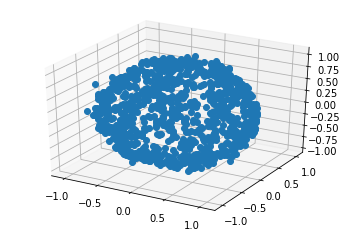

In [72]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [45]:
epochs = 2

In [47]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # print(linear)
      # compute the loss value for this minibatch
      # mse = Keras_loss_function(y_batch_train, linear)
      mse = tf.keras.losses.MSE(y_batch_train, linear)
      
      # print(mse)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(mse))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = Keras_loss_function(y_batch_val, val_linear)

  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_mse)))



Start of epoch 0
tf.Tensor(
[0.57494587 0.33508238 0.35065326 0.35559705 0.32295063 0.3999525
 0.5411604  0.3343054  0.34423485 0.30070588 0.44833454 0.59872377
 0.28540817 0.29142806 0.3642987  0.41084838 0.56092745 0.30895713
 0.35482576 0.24976857 0.1670237  0.2851925  0.23831482 0.22105622
 0.1412197  0.24243145 0.5348261  0.4946928  0.34075102 0.40731737
 0.79314345 0.4384757  0.524164   0.6165649  0.32332203 0.5213592
 0.5354426  0.40206334 0.63454676 0.9144104  0.6955177  0.4079878
 0.297591   0.57673997 0.30996206 0.25372437 0.24239714 0.2499665
 0.54856634 0.33951893 0.38865852 0.3212984  0.27440608 0.6210764
 0.25334936 0.33233312 0.19609107 0.4277029  0.55745345 0.21814251
 0.5449433  0.5946722  0.6395524  0.2264504  0.88247204 0.3592948
 0.29292303 0.35146663 0.2740141  0.5927867  0.27163103 0.2581769
 0.7544055  0.21777324 0.57660854 0.28524604 0.3367664  0.30108866
 0.5702116  0.33767867 0.30924603 0.32740083 0.45310566 0.50131106
 0.27663317 0.5209438  0.37912664 0.7450

TypeError: ignored